In [1]:
# Import some packages and libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import umap
import scipy
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv(r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\mnist_784.csv')

In [3]:
df = df.sample(n = 10000, random_state = 123) ##??? need random _state or not??


In [4]:
df.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
21971       0       0       0       0       0       0       0       0       0   
16953       0       0       0       0       0       0       0       0       0   
48447       0       0       0       0       0       0       0       0       0   
42344       0       0       0       0       0       0       0       0       0   
4376        0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
21971        0  ...         0         0         0         0         0   
16953        0  ...         0         0         0         0         0   
48447        0  ...         0         0         0         0         0   
42344        0  ...         0         0         0         0         0   
4376         0  ...         0         0         0         0         0   

       pixel781  pixel782  pixel783  pixel784  class  
21971         0         0         0         0      0  
16953         0         0         0         0      9  
48447         0         0         0         0      4  
42344         0         0         0         0      9  
4376          0         0         0         0      5  

[5 rows x 785 columns]

In [5]:
# Define Feature and target variable and Scaling images with divided by 255
X = df.drop('class', axis=1)/ 255
y = df['class']

print(X.shape, y.shape)

(10000, 784) (10000,)


In [6]:
# Putting some rows in variables:
x_123 = X.iloc[123]
x_124 = X.iloc[124]
x_125 = X.iloc[125]
x_126 = X.iloc[126]

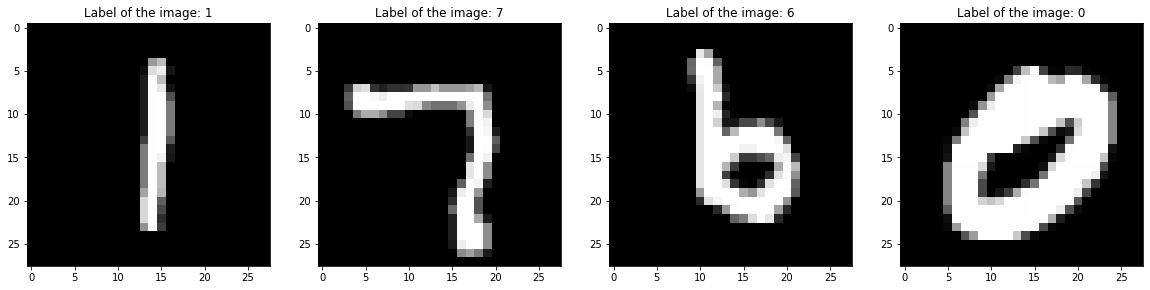

In [8]:
# Plot variables images and see what they look like:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(x_123.values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[123]))

plt.subplot(142)
plt.imshow(x_124.values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[124]))

plt.subplot(143)
plt.imshow(x_125.values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[125]))

plt.subplot(144)
plt.imshow(x_126.values.reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y.iloc[126]))

plt.show()

In [7]:
# We just want the first two principal components:
pca = PCA(n_components=2)

# We get the components by calling fit_transform method with our data:
pca_components = pca.fit_transform(X)

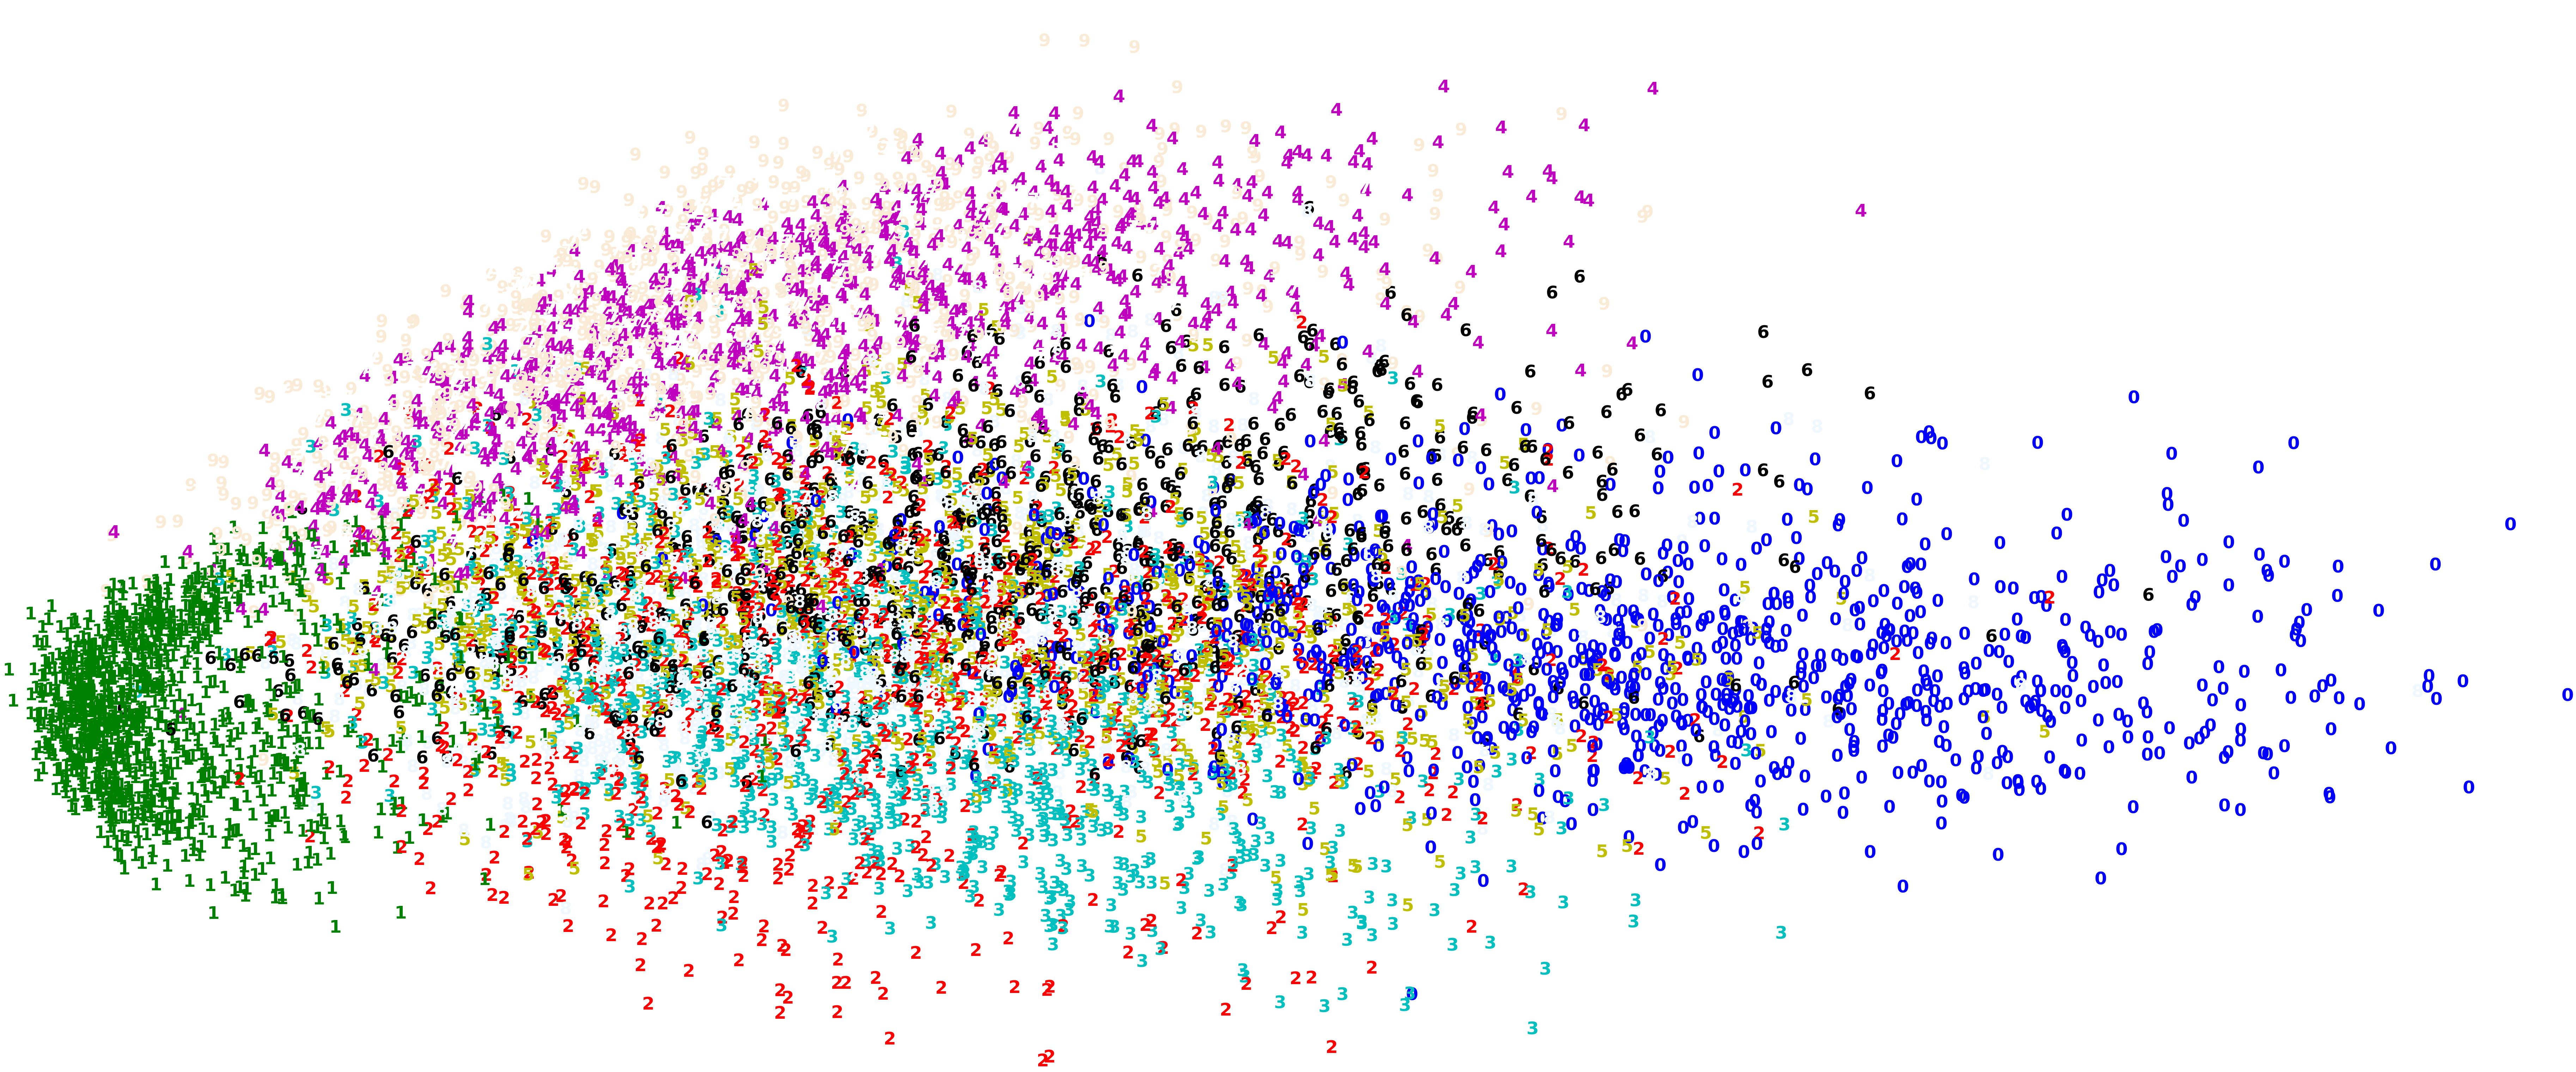

In [11]:
plt.figure(figsize=(10,5)) ### is there any simple way to create color???????

colours_dic = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors_dic = dict(itertools.islice(colours_dic.items(), 10))
colours = list(colors_dic.keys())
cmap = ListedColormap(colours)
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str((df['class']).iloc[i]),
             color=cmap((df['class']).iloc[i]),             
             fontdict={'weight': 'bold', 'size': 50})

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()